# Customer Churn Prediction Project

## About the Project
This project focuses on predicting customer churn in a bank, which refers to the likelihood of customers leaving the bank. By accurately predicting customer churn, banks can take proactive measures to retain customers, thus improving customer loyalty and increasing profitability. This project is highly useful in the banking industry as it enables the identification of at-risk customers and helps in formulating strategies to reduce churn rates.

## About Dataset
- **RowNumber**: Corresponds to the record (row) number and has no effect on the output.
- **CustomerId**: Contains random values and has no effect on customer leaving the bank.
- **Surname**: The surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography**: A customer’s location can affect their decision to leave the bank.
- **Gender**: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**: Refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**: Active customers are less likely to leave the bank.
- **EstimatedSalary**: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**: Whether or not the customer left the bank.
- **Complain**: Indicates whether the customer has a complaint or not.
- **Satisfaction Score**: Score provided by the customer for their complaint resolution.
- **Card Type**: The type of card held by the customer.
- **Points Earned**: The points earned by the customer for using the credit card.

#### DATASET LINK : https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


## IMPROTING ALL THE REQUIRE DEPENDENCIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

## LOADING THE DATASET

In [2]:
df = pd.read_csv('dataset/Churn_Modelling.csv')

## DATA CLEANING AND PROCESSING

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## EDA
### UNIVARIATE ANALYSIS

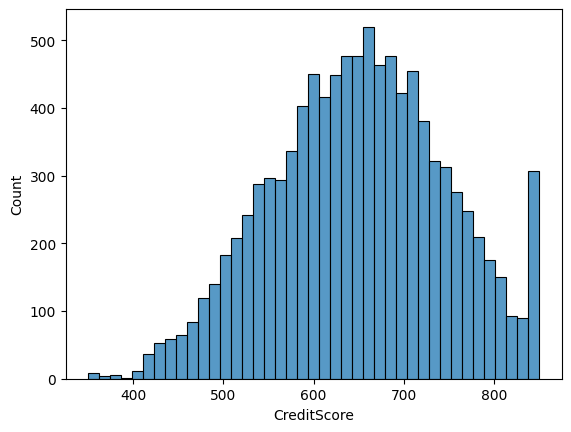

In [13]:
sns.histplot(data=df, x='CreditScore')
plt.show()

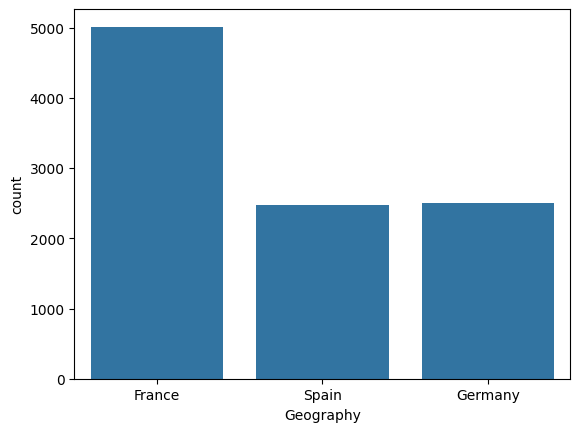

In [15]:
sns.countplot(data=df, x='Geography')
plt.show()

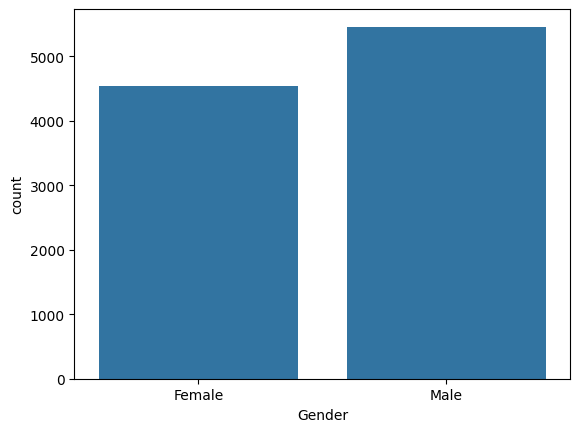

In [17]:
sns.countplot(data=df, x='Gender')
plt.show()

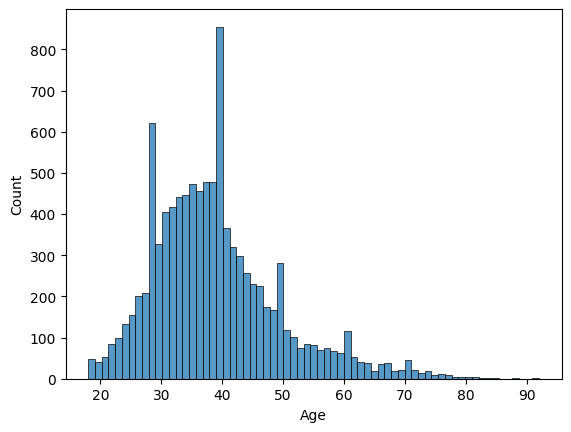

In [18]:
sns.histplot(data=df, x='Age')
plt.show()

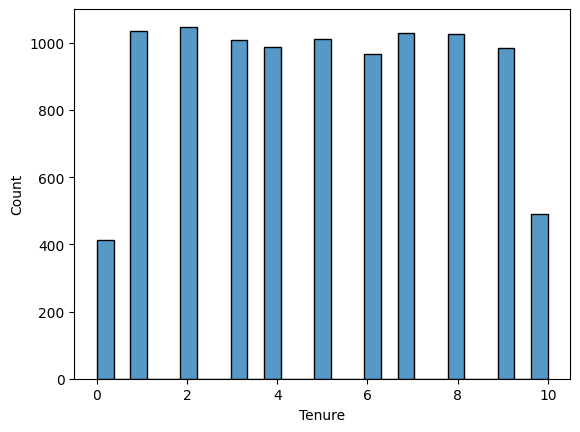

In [19]:
sns.histplot(data=df, x='Tenure')
plt.show()

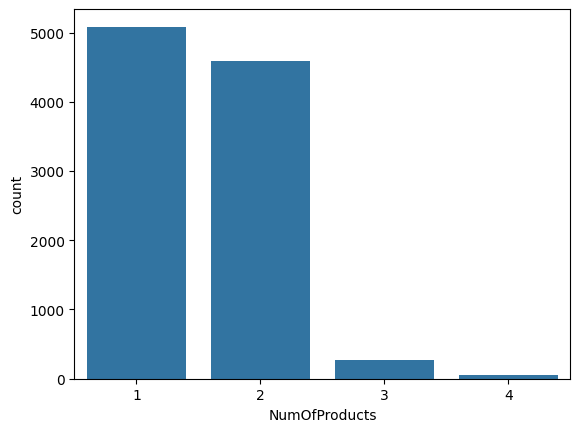

In [21]:
sns.countplot(data=df, x='NumOfProducts')
plt.show()

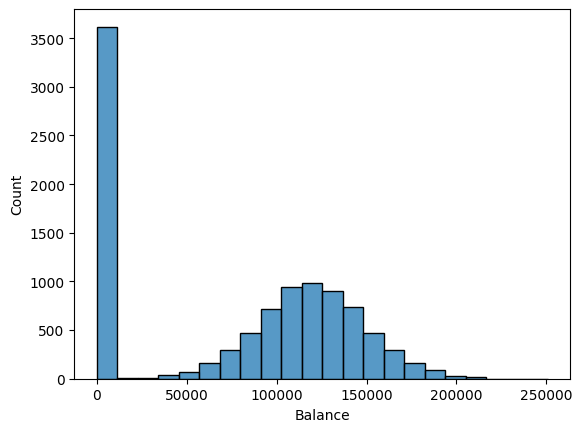

In [20]:
sns.histplot(data=df, x='Balance')
plt.show()

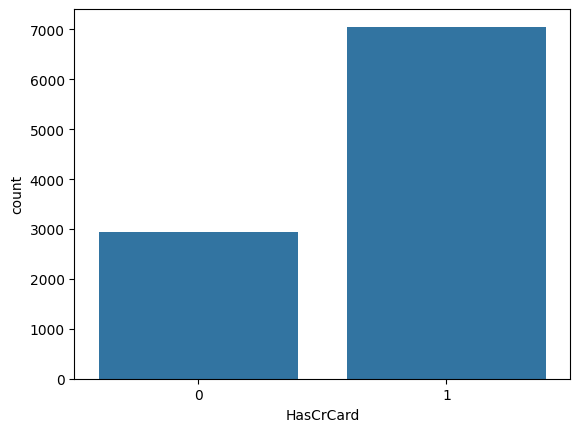

In [22]:
sns.countplot(data=df, x='HasCrCard')
plt.show()

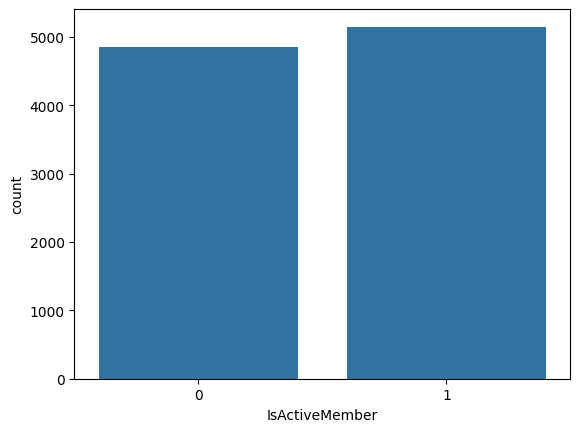

In [23]:
sns.countplot(data=df, x='IsActiveMember')
plt.show()

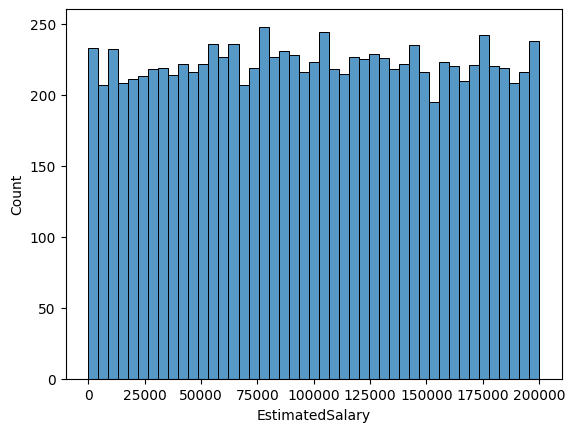

In [24]:
sns.histplot(data=df, x='EstimatedSalary', bins=45)
plt.show()

## BIVARIATE ANALYSIS

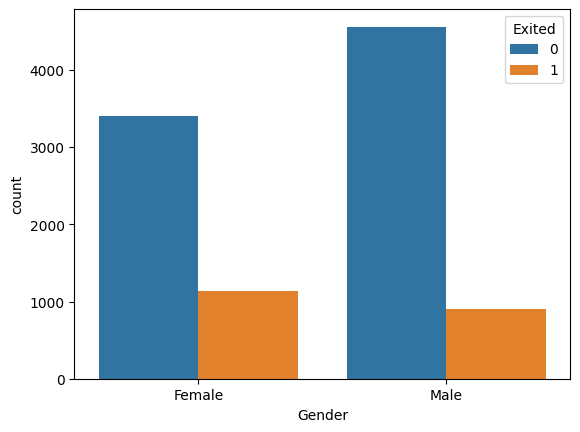

In [26]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.show()

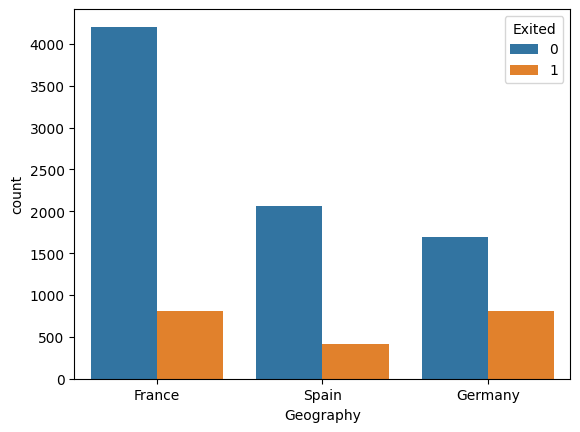

In [27]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.show()

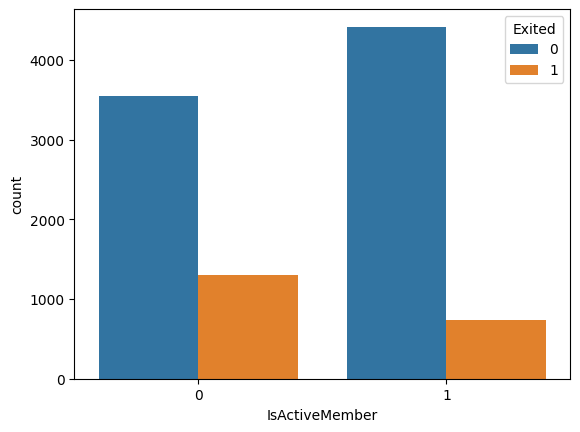

In [28]:
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.show()

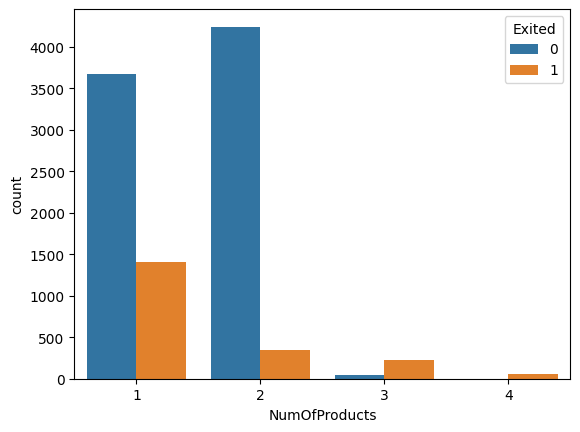

In [29]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.show()

#### MULTIVARIATE ANALYSIS

In [30]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [34]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [35]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


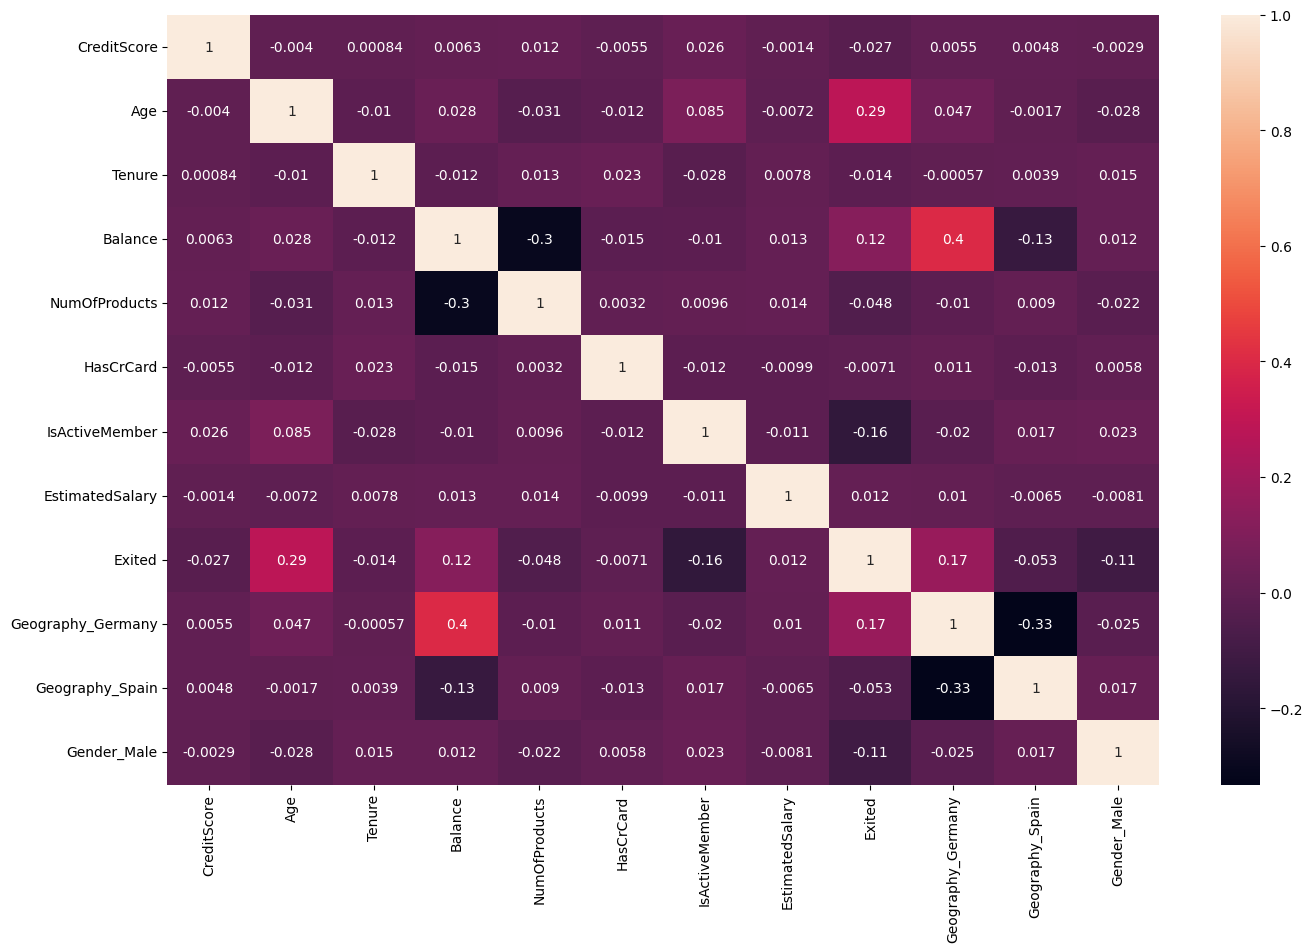

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

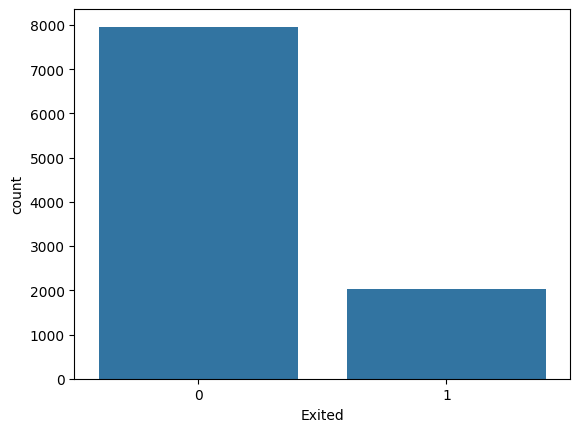

In [38]:
sns.countplot(data=df, x='Exited')

In [39]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [40]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [41]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [81]:
X_re, y_res = SMOTE().fit_resample(X, y)

In [83]:
X_re.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,648.618988,40.971682,4.806292,81795.819422,1.424589,0.622944,0.368203,100568.854223,0.247206,0.175939,0.412031
std,91.486876,10.020131,2.731173,61208.432369,0.577056,0.484664,0.482332,57559.002182,0.431401,0.380780,0.492216
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,586.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51554.227763,0.000000,0.000000,0.000000
50%,650.000000,40.000000,5.000000,102771.723484,1.000000,1.000000,0.000000,100560.700000,0.000000,0.000000,0.000000
75%,711.750000,47.000000,7.000000,129178.157814,2.000000,1.000000,1.000000,149882.791380,0.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [82]:
X_re

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.880000,0,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,0,1,0
2,502,42,8,159660.800000,3,1,0,113931.570000,0,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,538,57,2,0.000000,1,0,0,114250.684722,0,0,0
15922,490,44,3,89501.910919,2,1,0,136021.213442,0,0,0
15923,642,44,7,95437.288863,1,1,0,84878.287691,0,0,0
15924,513,38,1,0.000000,1,0,0,135543.563482,0,1,0


In [80]:
X_res

array([[-0.3246027 ,  0.10733722, -1.02367251, ..., -0.5738217 ,
        -0.46016051, -0.83929092],
       [-0.44514198,  0.00680484, -1.39012283, ..., -0.5738217 ,
         2.17315474, -0.83929092],
       [-1.60670227,  0.10733722,  1.17502942, ..., -0.5738217 ,
        -0.46016051, -0.83929092],
       ...,
       [-0.47801633, -0.2947923 ,  1.17502942, ..., -0.5738217 ,
        -0.46016051, -0.83929092],
       [-0.3246027 ,  1.01212866, -1.75657315, ...,  1.7427016 ,
        -0.46016051, -0.83929092],
       [-1.2889169 ,  0.8110639 ,  0.8085791 , ...,  1.7427016 ,
        -0.46016051, -0.83929092]])

In [43]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [45]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)

np.float64(0.7723833543505675)

In [47]:
recall_score(y_test, y_pred)

np.float64(0.7887958789439794)

In [48]:
f1_score(y_test, y_pred)

np.float64(0.7805033450143358)

In [49]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8380414312617702

In [50]:
precision_score(y_test, y_pred2)

np.float64(0.8317338451695457)

In [51]:
recall_score(y_test, y_pred2)

np.float64(0.8370895041854475)

In [52]:
f1_score(y_test, y_pred2)

np.float64(0.834403080872914)

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8163841807909604

In [54]:
precision_score(y_test, y_pred3)

np.float64(0.794762484774665)

In [55]:
recall_score(y_test, y_pred3)

np.float64(0.8403090792015454)

In [56]:
f1_score(y_test, y_pred3)

np.float64(0.8169014084507042)

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7944130571249215

In [58]:
precision_score(y_test, y_pred4)

np.float64(0.7754601226993865)

In [59]:
recall_score(y_test, y_pred4)

np.float64(0.8139085640695428)

In [60]:
f1_score(y_test, y_pred4)

np.float64(0.7942192899780082)

In [61]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred5 = rf.predict(X_test)

accuracy_score(y_test, y_pred5)

0.857187696170747

In [62]:
precision_score(y_test, y_pred5)

np.float64(0.8479087452471483)

In [63]:
recall_score(y_test, y_pred5)

np.float64(0.8615582743077914)

In [64]:
f1_score(y_test, y_pred5)

np.float64(0.8546790162887257)

In [65]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred6 = gbc.predict(X_test)

accuracy_score(y_test, y_pred6)

0.8411801632140615

In [66]:
precision_score(y_test, y_pred6)

np.float64(0.8357921744708147)

In [67]:
recall_score(y_test, y_pred6)

np.float64(0.8390212491951062)

In [68]:
f1_score(y_test, y_pred6)

np.float64(0.8374035989717223)

In [69]:
final_data = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred2),
                                  accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                  accuracy_score(y_test, y_pred5),
                                  accuracy_score(y_test, y_pred6)]})

In [70]:
final_data

,Model,ACC
0,LR,0.783741
1,SVC,0.838041
2,KNN,0.816384
3,DT,0.794413
4,RF,0.857188
5,GBC,0.841180


<Axes: xlabel='Model', ylabel='ACC'>

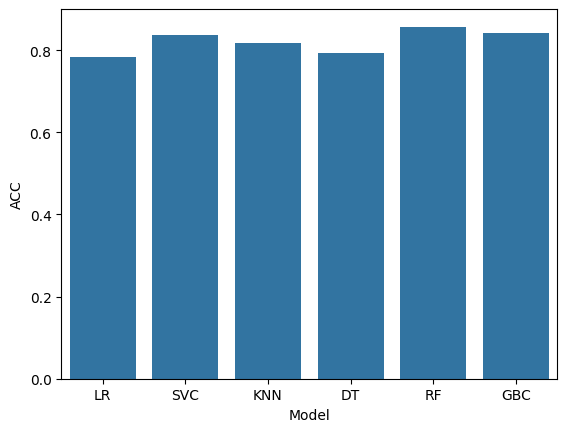

In [71]:
sns.barplot(data=final_data, x='Model',y='ACC')

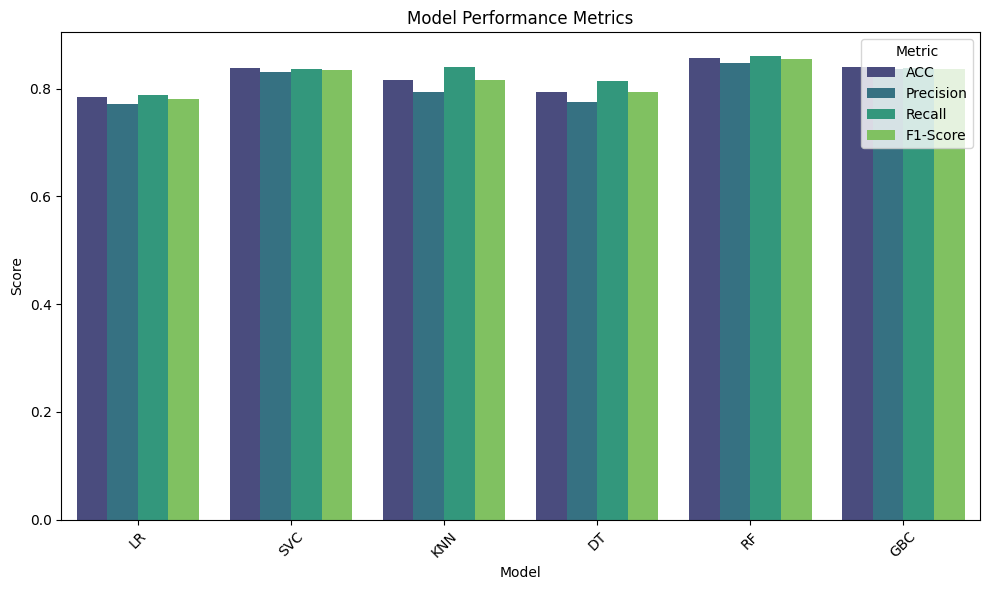

In [72]:
metrics = {
    'Model': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3),
        precision_score(y_test, y_pred4),
        precision_score(y_test, y_pred5),
        precision_score(y_test, y_pred6)
    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred2),
        recall_score(y_test, y_pred3),
        recall_score(y_test, y_pred4),
        recall_score(y_test, y_pred5),
        recall_score(y_test, y_pred6)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred2),
        f1_score(y_test, y_pred3),
        f1_score(y_test, y_pred4),
        f1_score(y_test, y_pred5),
        f1_score(y_test, y_pred6)
    ]
}

# Create the DataFrame
final_data = pd.DataFrame(metrics)

# Reshape the DataFrame to long format
final_data_long = pd.melt(final_data, id_vars=['Model'], var_name='Metric', value_name='Value')

# Create bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=final_data_long, palette='viridis')

# Customize the plot
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [73]:
final_data_long

,Model,Metric,Value
0,LR,ACC,0.783741
1,SVC,ACC,0.838041
2,KNN,ACC,0.816384
3,DT,ACC,0.794413
4,RF,ACC,0.857188
5,GBC,ACC,0.841180
6,LR,Precision,0.772383
7,SVC,Precision,0.831734
8,KNN,Precision,0.794762
9,DT,Precision,0.775460


In [74]:
X_res = sc.fit_transform(X_res)
rf.fit(X_res, y_res)

RandomForestClassifier()

In [75]:
joblib.dump(rf, 'churn_predict_joblib')

['churn_predict_joblib']

In [76]:
model = joblib.load('churn_predict_joblib')

In [84]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [78]:
df_pre = df.iloc[[9998]]
df_pre = df_pre.drop(df.columns[8], axis=1)
test = sc.transform(df_pre)
prediction = model.predict(test)
print(prediction)

[1]
